In [165]:
import numpy as np
import matplotlib.pyplot as plt


In [166]:
"""
Creating dummy dataset
"""

'\nCreating dummy dataset\n'

In [167]:
time = np.arange(0, 1500)

In [168]:
time.shape

(1500,)

In [169]:
y = np.sin(0.02 * time)

In [170]:
y_noise = np.sin(0.02 * time) + np.random.uniform(low=-1, high=1, size=(1500,))

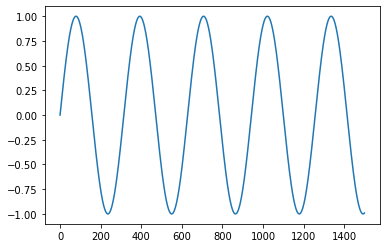

In [171]:
plt.plot(y)

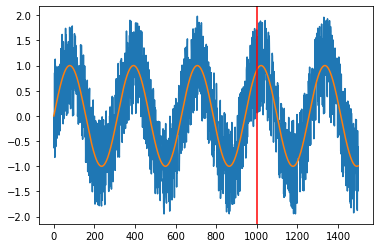

In [172]:
plt.plot(y_noise)
plt.plot(y)
plt.axvline(1000, color="red")

In [173]:
y_noise

array([-0.06840998,  0.00970287, -0.63805312, ..., -1.0194172 ,
       -0.61595467, -1.48418937])

In [174]:
yTarget = y_noise

In [175]:
yTarget.shape

(1500,)

In [176]:
"""
Preparing the time series/ Sequence dataset for RNN model.
"""

'\nPreparing the time series/ Sequence dataset for RNN model.\n'

In [177]:
# It is possible that features have values of different scales then 
# training with the different scale values might give error. 
# We have to convert all the features on the same scale before giving it to dataset.


In [178]:
from sklearn.preprocessing import MinMaxScaler

In [179]:
# convert my data to the scale from 0 to 1
normalizer = MinMaxScaler(feature_range=(0,1),)

In [180]:
yNormal =normalizer.fit_transform(yTarget.reshape(-1, 1))

In [181]:
yNormal

array([[0.47833599],
       [0.49824033],
       [0.33318224],
       ...,
       [0.23600486],
       [0.33881326],
       [0.11757384]])

In [182]:
# Split training and testing data
train = yNormal[0:1000]
test = yNormal[1000:]

In [183]:
train.shape

(1000, 1)

In [184]:
test.shape

(500, 1)

In [185]:
# This many times will the below loop will run
len(train) - 10

990

In [186]:
# Setting 10 steps as one observation
# first 10 values starting from the first element will be first (x) and  11th value will be y
# second 10 values starting from the second element will be second (x) and 12th value will be y


def createDS(data, step):
    X = []
    y = []

    for i in range(len(data) - step):
        X.append(data[i:i+step])
        y.append(data[i+step])
    return np.array(X), np.array(y)

In [187]:
# Creating train dataset
trainX, trainY = createDS(train, 10)

In [188]:
trainX.shape

(990, 10, 1)

In [189]:
trainY.shape

(990, 1)

In [190]:
trainX

array([[[0.47833599],
        [0.49824033],
        [0.33318224],
        ...,
        [0.7828349 ],
        [0.67906026],
        [0.74830801]],

       [[0.49824033],
        [0.33318224],
        [0.41231985],
        ...,
        [0.67906026],
        [0.74830801],
        [0.34089087]],

       [[0.33318224],
        [0.41231985],
        [0.71373799],
        ...,
        [0.74830801],
        [0.34089087],
        [0.495054  ]],

       ...,

       [[0.78290199],
        [0.74226558],
        [0.93757929],
        ...,
        [0.59251774],
        [0.72833547],
        [0.8816968 ]],

       [[0.74226558],
        [0.93757929],
        [0.4810131 ],
        ...,
        [0.72833547],
        [0.8816968 ],
        [0.6016828 ]],

       [[0.93757929],
        [0.4810131 ],
        [0.48402185],
        ...,
        [0.8816968 ],
        [0.6016828 ],
        [0.77223356]]])

In [191]:
# Creating test dataset
testX, testY = createDS(test, 10)

In [192]:
testX.shape

(490, 10, 1)

In [193]:
testY.shape

(490, 1)

In [194]:
"""
Creating the RNN model
"""

'\nCreating the RNN model\n'

In [195]:
from keras.models import Sequential
from keras.layers import Dense

# For RNN layer that will have short term memory
from keras.layers import SimpleRNN

In [196]:
model = Sequential()

In [197]:
# Adding simple RNN layer
model.add(
    SimpleRNN(
        units=1, 
        activation='tanh'
    )
)

In [198]:
# Adding ouput layer
model.add(
    Dense(
        units=1, 
        activation='linear' 
    )
)

In [199]:
# Model configuration details
model.get_config()

{'name': 'sequential_4',
 'layers': [{'class_name': 'SimpleRNN',
   'config': {'name': 'simple_rnn_4',
    'trainable': True,
    'dtype': 'float32',
    'return_sequences': False,
    'return_state': False,
    'go_backwards': False,
    'stateful': False,
    'unroll': False,
    'time_major': False,
    'units': 1,
    'activation': 'tanh',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'recurrent_initializer': {'class_name': 'Orthogonal',
     'config': {'gain': 1.0, 'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'recurrent_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'recurrent_constraint': None,
    'bias_constraint': None,
    'dropout': 0.0,
    'recurrent_dropout': 0.0}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_4',
    'trainable': True,
    'dtype': 'flo

In [200]:
model.compile(loss='mean_squared_error', optimizer='rmsprop')

In [201]:
model.fit(trainX, trainY, epochs=500)

7/500
31/31 [==============================] - 0s 3ms/step - loss: 0.0248
Epoch 258/500
31/31 [==============================] - 0s 4ms/step - loss: 0.0241
Epoch 259/500
31/31 [==============================] - 0s 3ms/step - loss: 0.0238
Epoch 260/500
31/31 [==============================] - 0s 3ms/step - loss: 0.0237
Epoch 261/500
31/31 [==============================] - 0s 3ms/step - loss: 0.0255
Epoch 262/500
31/31 [==============================] - 0s 3ms/step - loss: 0.0247
Epoch 263/500
31/31 [==============================] - 0s 3ms/step - loss: 0.0248
Epoch 264/500
31/31 [==============================] - 0s 3ms/step - loss: 0.0244
Epoch 265/500
31/31 [==============================] - 0s 3ms/step - loss: 0.0237
Epoch 266/500
31/31 [==============================] - 0s 3ms/step - loss: 0.0243
Epoch 267/500
31/31 [==============================] - 0s 3ms/step - loss: 0.0251
Epoch 268/500
31/31 [==============================] - 0s 3ms/step - loss: 0.0235
Epoch 269/500
31/31 [===

In [202]:
train_pred = model.predict(trainX)
test_pred = model.predict(testX)

In [203]:
# convert to the original scale
train_pred = normalizer.inverse_transform(train_pred)
test_pred = normalizer.inverse_transform(test_pred)

In [204]:
predict = np.vstack((train_pred, test_pred))

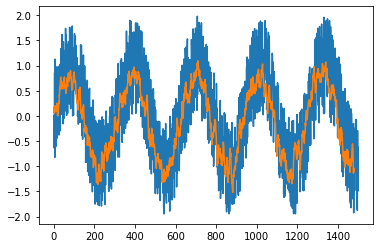

In [205]:
plt.plot(yTarget)
plt.plot(predict)